# Before conducting the analyis,
# we can briefly see the Tableau visualtion to see the data set
https://public.tableau.com/app/profile/jun.song/viz/H1b_Top15_Wages/Dashboard1

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
import seaborn as sns

In [4]:
# reading data
h1b = pd.read_csv('/Users/junchangsong/downloads/h1b_2015_2019.csv',encoding='latin-1')

In [5]:
# Checking Data
h1b.head()

,CASE_NUMBER,CASE_STATUS,EMPLOYER_NAME,SOC_NAME,SOC_CODE,JOB_TITLE,FULL_TIME_POSITION,PREVAILING_WAGE,WORKSITE_CITY,WORKSITE_STATE_ABB,YEAR,WORKSITE_STATE_FULL,WORKSITE
0,I-200-09285-514415,CERTIFIED,IT CATS LLC,COMPUTER SYSTEMS ANALYSTS,15-1121,SENIOR BUSINESS ANALYST,Y,109116.8,"NORTH WALES,",PA,2015,PENNSYLVANIA,"NORTH WALES, PENNSYLVANIA"
1,I-200-09341-564186,CERTIFIED-WITHDRAWN,"XPERT TECHNOLOGIES, INC.","COMPUTER OCCUPATIONS, ALL OTHER*",15-1799,QUALITY ASSURANCE ANALYST,Y,58282.0,CAMP HILL,PA,2015,PENNSYLVANIA,"CAMP HILL, PENNSYLVANIA"
2,I-200-09342-274341,CERTIFIED,"ISR INFO WAY, INC.","SOFTWARE DEVELOPERS, APPLICATIONS",15-1132,SR. SOFTWARE DEVELOPER,Y,84906.0,CHICAGO,IL,2015,ILLINOIS,"CHICAGO, ILLINOIS"
3,I-200-09364-425868,CERTIFIED,MAGIC CIRCLE FILMS INTERNATIONAL LLC,FILM AND VIDEO EDITORS,27-4032,VIDEO EDITOR,Y,39333.0,AUBURN,NY,2015,NEW YORK,"AUBURN, NEW YORK"
4,I-200-10006-413683,WITHDRAWN,SAPHIRE SOLUTIONS INC,NETWORK AND COMPUTER SYSTEMS ADMINISTRATORS,15-1142,SYSTEMS ADMINISTRATOR,Y,68638.0,BETHPAGE,NY,2015,NEW YORK,"BETHPAGE, NEW YORK"


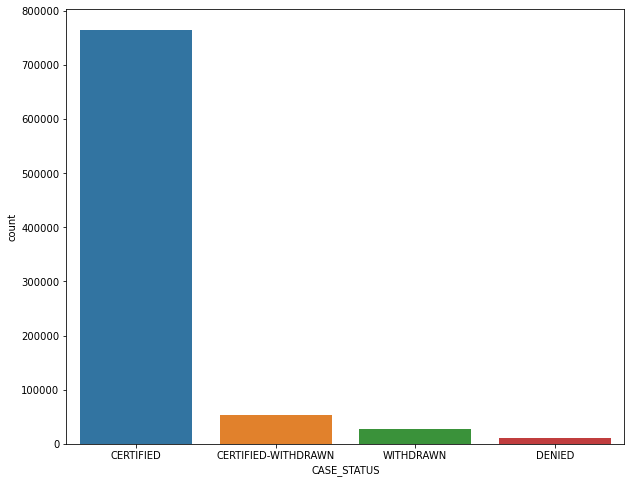

In [6]:
# Basic count plot to see the trends
plt.figure(figsize=(10,8))
sns.countplot(data=h1b,x="CASE_STATUS");

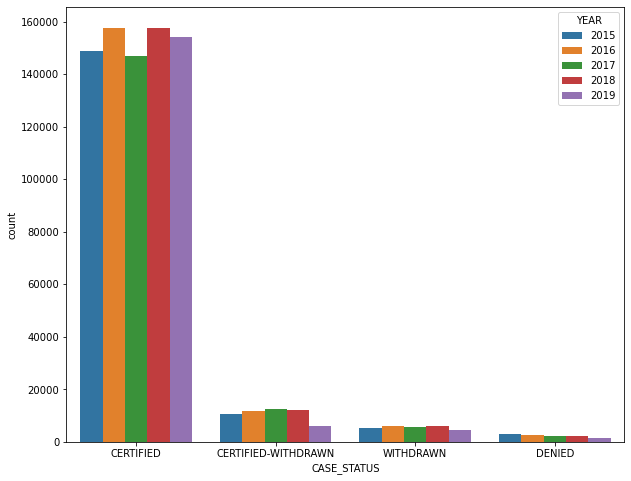

In [7]:
# We want to see the changes through out years
plt.figure(figsize=(10,8))
sns.countplot(data=h1b,x="CASE_STATUS",hue='YEAR');

In [8]:
# We want to see the trend on Denied
h1b_denied = h1b[h1b['CASE_STATUS']=='DENIED']

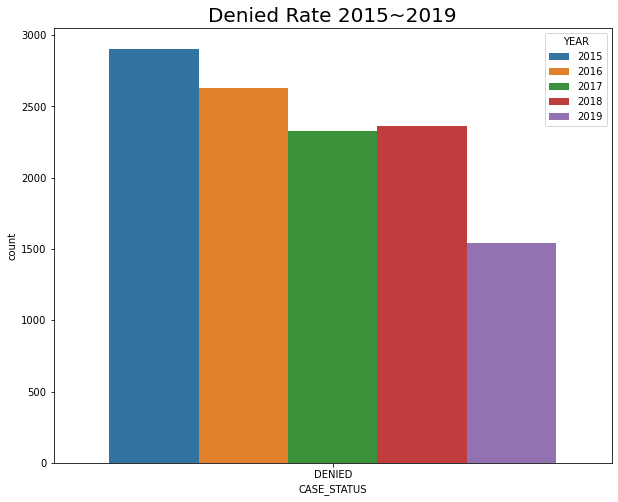

In [9]:
plt.figure(figsize=(10,8))
sns.countplot(data=h1b_denied,x='CASE_STATUS',hue='YEAR')
plt.title("Denied Rate 2015~2019",fontsize=20);

## As we see the count plot above, Denied rate has been decreasing

In [10]:
# What is top 15 compnanies that apply H1b visa?
top15Employers = pd.DataFrame(h1b['EMPLOYER_NAME'].value_counts().head(15))
top15Employers

,EMPLOYER_NAME
INFOSYS LIMITED,23802
TATA CONSULTANCY SERVICES LIMITED,23775
DELOITTE CONSULTING LLP,18579
CAPGEMINI AMERICA INC,16498
ACCENTURE LLP,11473
ERNST & YOUNG U.S. LLP,11192
COGNIZANT TECHNOLOGY SOLUTIONS US CORP,10096
WIPRO LIMITED,9289
IBM INDIA PRIVATE LIMITED,8289
IBM CORPORATION,5086


In [11]:
# Now we want to know what kind of jobs are requested H1b Visa
top15job = pd.DataFrame(h1b['JOB_TITLE'].value_counts().head(15))
top15job

,JOB_TITLE
PROGRAMMER ANALYST,41003
SOFTWARE ENGINEER,27647
SOFTWARE DEVELOPER,26615
SYSTEMS ANALYST,10922
DEVELOPER,10227
ASSOCIATE,9257
COMPUTER PROGRAMMER,9201
BUSINESS ANALYST,9154
CONSULTANT,8911
SENIOR CONSULTANT,8221


In [12]:
top15soc = pd.DataFrame(h1b['SOC_NAME'].value_counts().head(15))
top15soc

,SOC_NAME
"SOFTWARE DEVELOPERS, APPLICATIONS",172819
COMPUTER SYSTEMS ANALYSTS,108160
COMPUTER PROGRAMMERS,67653
"COMPUTER OCCUPATIONS, ALL OTHER",67305
"SOFTWARE DEVELOPERS, SYSTEMS SOFTWARE",26061
FINANCIAL ANALYSTS,26032
MECHANICAL ENGINEERS,25188
MANAGEMENT ANALYSTS,21494
COMPUTER SYSTEMS ANALYST,20178
ACCOUNTANTS AND AUDITORS,17899


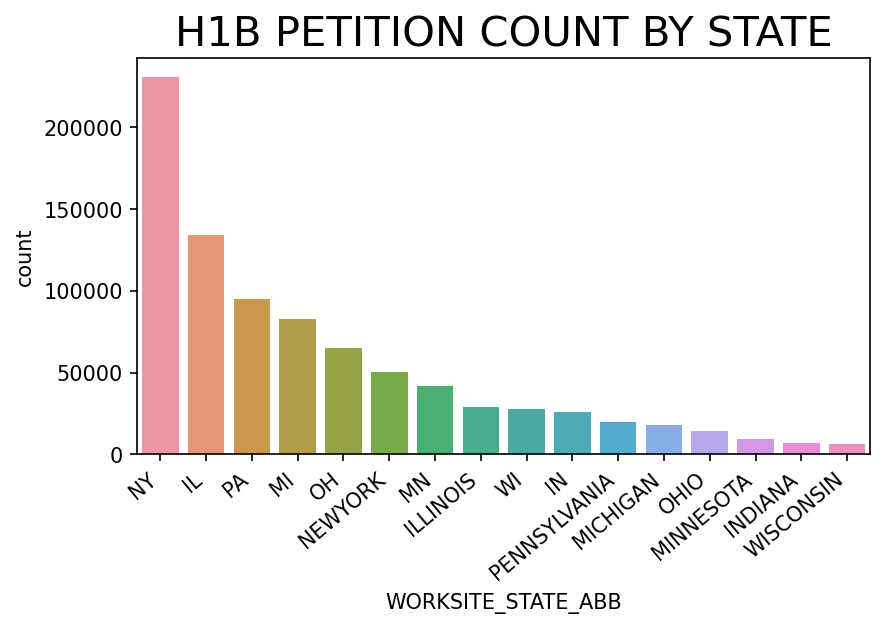

In [17]:
# Which State has most H1b applicants?
plt.figure(dpi=150)
ax = sns.countplot(data=h1b, x=h1b['WORKSITE_STATE_ABB'],order = h1b['WORKSITE_STATE_ABB'].value_counts().index)
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
plt.tight_layout()
plt.title("H1B PETITION COUNT BY STATE",fontsize=20);

As we see companies in New York requested the most H1b petitions.<br />
However, the data has (NY, Newyork), (IL, Illinois), (OH, OHIO), (MI, Michigan), (WI, Wisconsin), (MN, Minnesota), (PA, Pennsylavania), which means we need to organize worksite_state_abb column to obtain a better count plot

**Instead of converting WORKSITE_STATE_ABB column, we can pick another column, which is 'WORKSITE_STATE_FULL'**

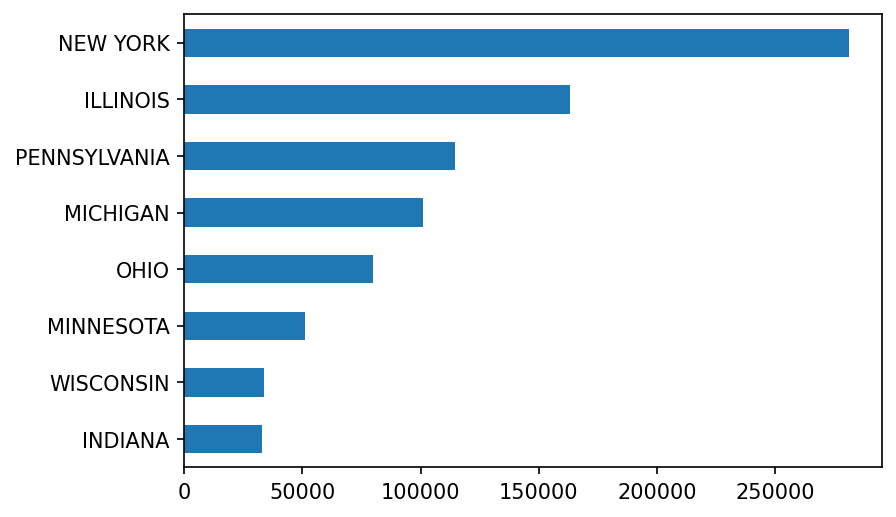

In [20]:
plt.figure(dpi=150)
h1b.WORKSITE_STATE_FULL.value_counts()[:50].plot(kind='barh').invert_yaxis()